In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the arbour,sector 63,7.90,20000.0,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
1,flat,birla navya,sector 63a,3.70,15417.0,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0
2,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0
4,flat,ireo the corridors,sector 67a,1.85,9531.0,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0


User won't give these two columns as input

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 63,7.90,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
1,flat,sector 63a,3.70,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0
2,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
3,house,sector 33,11.50,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0
4,flat,sector 67a,1.85,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0


/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_52439/663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

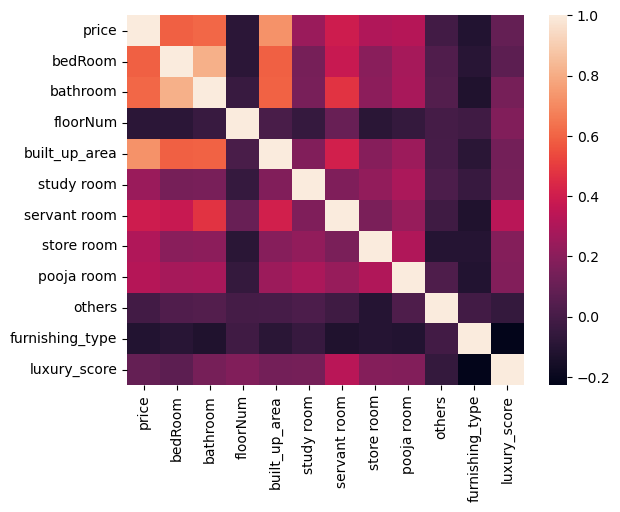

In [8]:
sns.heatmap(train_df.corr())

In [9]:
train_df.corr()['price'].sort_values(ascending=False)

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_52439/897562334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.726002
bathroom           0.609863
bedRoom            0.591403
servant room       0.392126
pooja room         0.319913
store room         0.305714
study room         0.243025
luxury_score       0.091697
others            -0.013002
floorNum          -0.087277
furnishing_type   -0.112108
Name: price, dtype: float64

In [10]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

### luxury score

<Axes: >

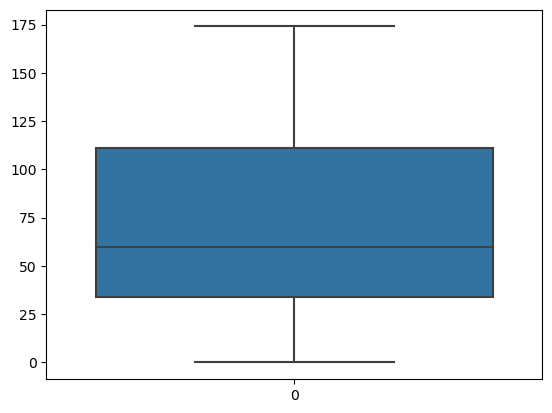

In [11]:
sns.boxplot(df['luxury_score'])

In [12]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [13]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 63,7.90,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,Medium
1,flat,sector 63a,3.70,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,Medium
2,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,Low
3,house,sector 33,11.50,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0,Medium
4,flat,sector 67a,1.85,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0,High


### floorNum

<Axes: >

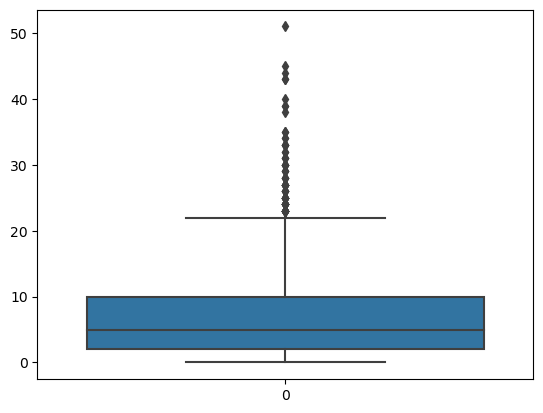

In [15]:
sns.boxplot(df['floorNum'])

In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [17]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 63,7.90,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,Medium,High Floor
1,flat,sector 63a,3.70,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,Medium,Low Floor
2,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,Low,Mid Floor
3,house,sector 33,11.50,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0,Medium,Mid Floor
4,flat,sector 67a,1.85,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0,High,Mid Floor


In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 63,7.90,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,Medium,High Floor
1,flat,sector 63a,3.70,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,Medium,Low Floor
2,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,Low,Mid Floor
3,house,sector 33,11.50,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0,Medium,Mid Floor
4,flat,sector 67a,1.85,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0,High,Mid Floor


In [20]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [21]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 63,7.90,4.0,4.0,3+,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,High Floor
1,flat,sector 63a,3.70,3.0,3.0,3+,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Low Floor
2,flat,manesar,1.20,3.0,3.0,3+,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,Low,Mid Floor
3,house,sector 33,11.50,5.0,6.0,3+,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,Medium,Mid Floor
4,flat,sector 67a,1.85,3.0,4.0,3,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector

In [23]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,69.0,4.0,4.0,4.0,4.0,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.0,70.0,3.0,3.0,4.0,4.0,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
2,0.0,2.0,3.0,3.0,4.0,0.0,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
3,1.0,37.0,5.0,6.0,4.0,3.0,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
4,0.0,74.0,3.0,4.0,3.0,1.0,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,1.0,81.0,4.0,5.0,4.0,3.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3550,0.0,33.0,2.0,2.0,2.0,0.0,1109.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3551,0.0,33.0,3.0,4.0,3.0,2.0,3133.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
3552,0.0,87.0,2.0,2.0,4.0,1.0,1223.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [24]:
y_label

0        7.90
1        3.70
2        1.20
3       11.50
4        1.85
        ...  
3549     8.60
3550     1.35
3551     4.30
3552     1.10
3553     1.54
Name: price, Length: 3554, dtype: float64

### Technique-1 Correlation Analysis

<Axes: >

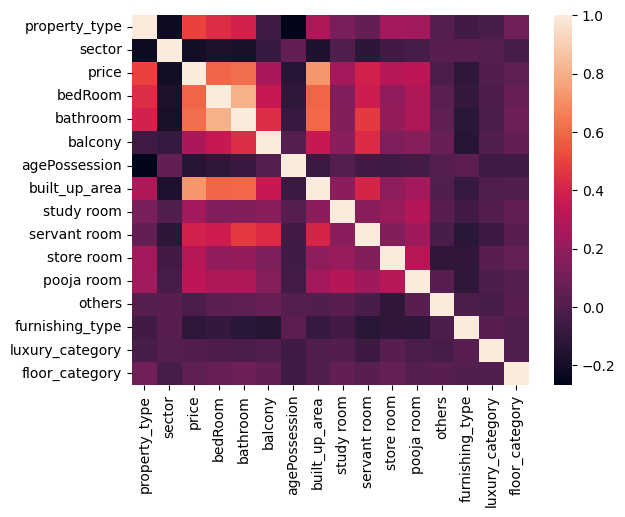

In [25]:
sns.heatmap(data_label_encoded.corr())

In [26]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.203060
1,price,1.000000
2,bedRoom,0.591403
3,bathroom,0.609863
4,balcony,0.269905
5,agePossession,-0.132963
6,built_up_area,0.726002
7,study room,0.243025
8,servant room,0.392126
9,store room,0.305714


### Technique 2 - Random Forest Feature Importance

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.644240
0,property_type,0.109920
1,sector,0.105443
2,bedRoom,0.022136
3,bathroom,0.021939
8,servant room,0.021688
5,agePossession,0.015061
4,balcony,0.012986
12,furnishing_type,0.010528
9,store room,0.008079


### Technique 3 - Gradient Boosting Feature importances

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683759
1,sector,0.100586
0,property_type,0.100085
2,bedRoom,0.033077
3,bathroom,0.031786
8,servant room,0.027727
9,store room,0.009219
5,agePossession,0.005665
4,balcony,0.002547
12,furnishing_type,0.002375


### Technique 4 - Permutation Importance

In [29]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.707511
0,property_type,0.181018
1,sector,0.137893
8,servant room,0.016566
4,balcony,0.006495
12,furnishing_type,0.002434
2,bedRoom,0.001839
14,floor_category,0.000817
5,agePossession,0.000667
7,study room,-0.000175


### Technique 5 - LASSO

In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.398871
0,property_type,0.724730
3,bathroom,0.308654
8,servant room,0.218547
9,store room,0.215445
7,study room,0.174756
10,pooja room,0.077998
2,bedRoom,0.070029
13,luxury_category,0.048833
14,floor_category,-0.000851


### Technique 6 - RFE

In [31]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.643792
1,sector,0.108561
0,property_type,0.104651
3,bathroom,0.025466
2,bedRoom,0.024394
8,servant room,0.019636
5,agePossession,0.013749
4,balcony,0.012606
12,furnishing_type,0.009296
7,study room,0.008764


### Technique 7 - Linear Regression Weights

In [32]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.401693
0,property_type,0.721679
3,bathroom,0.316398
8,servant room,0.227832
9,store room,0.220002
7,study room,0.183750
10,pooja room,0.081383
2,bedRoom,0.072974
13,luxury_category,0.059173
5,agePossession,-0.010205


### Technique 8 - SHAP

In [33]:
!pip install shap

In [34]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.45803946,  1.0289373 ,  0.11360566, ..., -0.01325533,
         0.04630453,  0.03258257],
       [-0.42286364,  0.65907189,  0.00325433, ..., -0.06210751,
        -0.04071562, -0.00901508],
       [-0.96420369, -1.44325425, -0.07295045, ..., -0.02736314,
        -0.00824493, -0.02633371],
       ...,
       [-1.58158466,  0.46778814,  0.03987071, ..., -0.01670616,
         0.0141393 , -0.00980925],
       [-0.18122134, -0.1890146 , -0.04347837, ...,  0.00795302,
         0.00369178, -0.00646165],
       [-0.40040676,  0.19005274, -0.0333789 , ..., -0.015549  ,
        -0.03582545, -0.08324387]])

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.251379
0,property_type,0.491980
1,sector,0.390751
3,bathroom,0.103592
8,servant room,0.100561
2,bedRoom,0.050306
4,balcony,0.043195
12,furnishing_type,0.027024
5,agePossession,0.026476
14,floor_category,0.023284


In [36]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [37]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.203060,0.105443,0.100586,0.137893,-0.061212,0.108561,-0.069861,0.390751
bedRoom,0.591403,0.022136,0.033077,0.001839,0.070029,0.024394,0.072974,0.050306
bathroom,0.609863,0.021939,0.031786,-0.003015,0.308654,0.025466,0.316398,0.103592
balcony,0.269905,0.012986,0.002547,0.006495,-0.025386,0.012606,-0.048447,0.043195
agePossession,-0.132963,0.015061,0.005665,0.000667,-0.002540,0.013749,-0.010205,0.026476
built_up_area,0.726002,0.644240,0.683759,0.707511,1.398871,0.643792,1.401693,1.251379
study room,0.243025,0.007288,0.002215,-0.000175,0.174756,0.008764,0.183750,0.018111
servant room,0.392126,0.021688,0.027727,0.016566,0.218547,0.019636,0.227832,0.100561
store room,0.305714,0.008079,0.009219,-0.000485,0.215445,0.008281,0.220002,0.016065


In [38]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.723871
sector             0.139623
servant room       0.028899
bathroom           0.026935
bedRoom            0.023029
balcony            0.011946
agePossession      0.010411
furnishing_type    0.008126
store room         0.007145
study room         0.005786
floor_category     0.005103
luxury_category    0.004028
pooja room         0.003221
others             0.001877
dtype: float64

In [40]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,69.0,4.0,4.0,4.0,4.0,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.0,70.0,3.0,3.0,4.0,4.0,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
2,0.0,2.0,3.0,3.0,4.0,0.0,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
3,1.0,37.0,5.0,6.0,4.0,3.0,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
4,0.0,74.0,3.0,4.0,3.0,1.0,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,1.0,81.0,4.0,5.0,4.0,3.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3550,0.0,33.0,2.0,2.0,2.0,0.0,1109.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3551,0.0,33.0,3.0,4.0,3.0,2.0,3133.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
3552,0.0,87.0,2.0,2.0,4.0,1.0,1223.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [41]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.8027569246537821

In [43]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [44]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [45]:
train_df1=train_df.drop(columns=['pooja room', 'study room', 'others'])

In [46]:
train_df1.to_csv('gurgaon_properties_post_feature_selection_2.csv', index=False)